## Import libs

In [1]:
from math import sqrt, isnan
from pathlib import Path

import tensorflow as tf
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.data import Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from util import metrics
from util.load_data import load_data
from util.evaluation import *

from fairgan.models import *
from fairgan.learning import *

## Preliminaries

In [2]:
batch_size = 64
epochs = 10
learning_rate = 0.001
opt = Adam(learning_rate=learning_rate)

## Load data

In [3]:
x_train, y_train, a_train = load_data('adult', 'train')
raw_data = (x_train, y_train, a_train)

In [4]:
xdim = x_train.shape[1]
ydim = y_train.shape[1]
adim = a_train.shape[1]

In [5]:
xdim

113

In [6]:
train_data = Dataset.from_tensor_slices((x_train, y_train, a_train))
train_data = train_data.batch(batch_size, drop_remainder=True)
train_data

<BatchDataset shapes: ((64, 113), (64, 1), (64, 1)), types: (tf.float64, tf.float64, tf.float64)>

In [7]:
x_valid, y_valid, a_valid = load_data('adult', 'valid')

valid_data = Dataset.from_tensor_slices((x_valid, y_valid, a_valid))
valid_data = valid_data.batch(batch_size, drop_remainder=True)

In [8]:
x_test, y_test, a_test = load_data('adult', 'test')

test_data = Dataset.from_tensor_slices((x_test, y_test, a_test))
test_data = test_data.batch(batch_size, drop_remainder=True)

## Testing if models are being trained

### For the Autoencoder

In [13]:
model = Autoencoder(xdim, ydim, adim)
pre_train_loop(model, raw_data, train_data, epochs=10, opt=opt)

> Epoch | Model Loss
> 1 | 20638.849609375
> 2 | 20638.849609375
> 3 | 20638.849609375
> 4 | 20638.849609375
> 5 | 20638.849609375
> 6 | 20638.849609375
> 7 | 20638.849609375
> 8 | 20638.849609375
> 9 | 20638.849609375
> 10 | 20638.849609375


In [12]:
model.dec_repr

<tf.Tensor: shape=(64, 115), dtype=float32, numpy=
array([[4.8974599e-04, 2.2553112e-01, 1.7921838e-01, ..., 4.2342162e-01,
        2.2146489e-01, 4.2342162e-01],
       [4.2833234e-04, 2.2014183e-01, 1.7582913e-01, ..., 4.3063959e-01,
        2.1337229e-01, 4.3063959e-01],
       [5.5633165e-04, 2.3147723e-01, 1.8534756e-01, ..., 4.4567987e-01,
        2.2438212e-01, 4.4567987e-01],
       ...,
       [5.8767601e-04, 2.3868996e-01, 1.8678144e-01, ..., 4.2919537e-01,
        2.3220222e-01, 4.2919537e-01],
       [5.3231174e-04, 2.3056090e-01, 1.8526134e-01, ..., 4.4479826e-01,
        2.2179863e-01, 4.4479826e-01],
       [4.2218537e-04, 2.2282286e-01, 1.7116158e-01, ..., 4.3116188e-01,
        2.1189116e-01, 4.3116188e-01]], dtype=float32)>

### For DP

In [ ]:
fairdef='DemPar'
model = FairLogisticRegression(xdim, batch_size, fairdef)

ret = train_loop(model, raw_data, train_data, 1)

> Epoch | Class Loss | Adv Loss | Class Acc | Adv Acc
> 1 | 0.9859949946403503 | 0.5817514657974243 | 0.7359084880636605 | 0.5037301061007957


In [ ]:
Y_hat, A_hat = validation(model, valid_data)
ret = compute_metrics(y_valid, Y_hat, a_valid, A_hat)

> Class Acc | Adv Acc
> 0.7308843085106382 | 0.718251329787234
> DP | DI | DEOPP
> 0.5079933404922485 | 0.47679609060287476 | 0.2746155858039856
> Confusion Matrix 
TN: 3189.0 | FP: 1329.0 
FN: 290.0 | TP: 1208.0
> Confusion Matrix for A = 0 
TN: 1602.0 | FP: 65.0 
FN: 141.0 | TP: 71.0
> Confusion Matrix for A = 1 
TN: 1587.0 | FP: 1264.0 
FN: 149.0 | TP: 1137.0


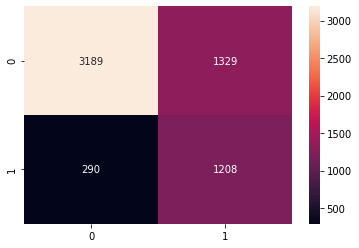

In [ ]:
sns.heatmap(ret[4], annot=True, fmt='g')

### For EqOdds

In [ ]:
fairdef='EqOdds'
model = FairLogisticRegression(xdim, batch_size, fairdef)
ret = train_loop(model, raw_data, train_data, 1)

> Epoch | Class Loss | Adv Loss | Class Acc | Adv Acc
> 1 | 0.8880362510681152 | 0.7379366159439087 | 0.7536057692307692 | 0.3326840185676393


In [ ]:
Y_hat, A_hat = validation(model, valid_data)
ret = compute_metrics(y_valid, Y_hat, a_valid, A_hat)

> Class Acc | Adv Acc
> 0.8070146276595744 | 0.3700132978723404
> DP | DI | DEOPP
> 0.15971998870372772 | 0.11412912607192993 | 0.07780450582504272
> Confusion Matrix 
TN: 4132.0 | FP: 386.0 
FN: 775.0 | TP: 723.0
> Confusion Matrix for A = 0 
TN: 1601.0 | FP: 66.0 
FN: 138.0 | TP: 74.0
> Confusion Matrix for A = 1 
TN: 2531.0 | FP: 320.0 
FN: 637.0 | TP: 649.0


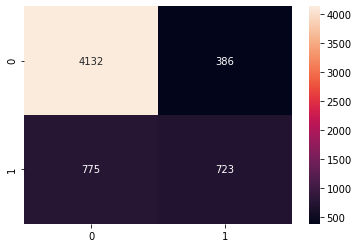

In [ ]:
sns.heatmap(ret[4], annot=True, fmt='g')

### For EqOpp

In [ ]:
fairdef='EqOpp'
model = FairLogisticRegression(xdim, batch_size, fairdef)
ret = train_loop(model, raw_data, train_data, 1)

> Epoch | Class Loss | Adv Loss | Class Acc | Adv Acc
> 1 | 0.4192975163459778 | 0.2229214310646057 | 0.7571286472148542 | 0.32949270557029176


In [ ]:
Y_hat, A_hat = validation(model, valid_data)
ret = compute_metrics(y_valid, Y_hat, a_valid, A_hat)

> Class Acc | Adv Acc
> 0.8134973404255319 | 0.3407579787234043
> DP | DI | DEOPP
> 0.1341627687215805 | 0.07546760886907578 | 0.04480765759944916
> Confusion Matrix 
TN: 4270.0 | FP: 248.0 
FN: 874.0 | TP: 624.0
> Confusion Matrix for A = 0 
TN: 1640.0 | FP: 27.0 
FN: 140.0 | TP: 72.0
> Confusion Matrix for A = 1 
TN: 2630.0 | FP: 221.0 
FN: 734.0 | TP: 552.0


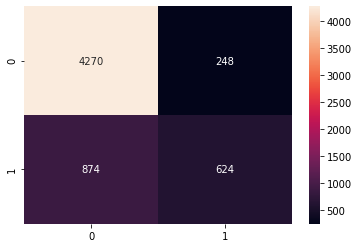

In [ ]:
sns.heatmap(ret[4], annot=True, fmt='g')

## Models

In [ ]:
cmap = sns.light_palette("seagreen", as_cmap=True)

In [ ]:
#For DemPar
fairdef = 'DemPar'
model = FairLogisticRegression(xdim, batch_size, fairdef)
train_loop(model, raw_data, train_data, epochs)
print('Validation')
Y_hat, A_hat = validation(model, valid_data)
ret4dp = compute_metrics(y_valid, Y_hat, a_valid, A_hat)

> Epoch | Class Loss | Adv Loss | Class Acc | Adv Acc
> 1 | 1.1422122716903687 | 0.48541492223739624 | 0.698151525198939 | 0.6803713527851458
> 2 | 0.45500022172927856 | 0.4811234474182129 | 0.7590351458885942 | 0.7359084880636605
> 3 | 0.41059815883636475 | 0.4765283465385437 | 0.7866379310344828 | 0.73342175066313
> 4 | 0.39020687341690063 | 0.4737137258052826 | 0.8031332891246684 | 0.729194297082228
> 5 | 0.3744243085384369 | 0.4758276045322418 | 0.8152768567639257 | 0.728241047745358
> 6 | 0.36664652824401855 | 0.47482138872146606 | 0.8234830901856764 | 0.7286969496021221
> 7 | 0.3603705167770386 | 0.4770249128341675 | 0.8289124668435013 | 0.729401525198939
> 8 | 0.3558707535266876 | 0.47892990708351135 | 0.832145225464191 | 0.7304791114058355
> 9 | 0.35239413380622864 | 0.4801368713378906 | 0.8341760610079576 | 0.7317224801061009
> 10 | 0.3495618999004364 | 0.4809751510620117 | 0.8357509946949602 | 0.7316810344827587
Validation
> Class Acc | Adv Acc
> 0.8326130319148937 | 0.725897

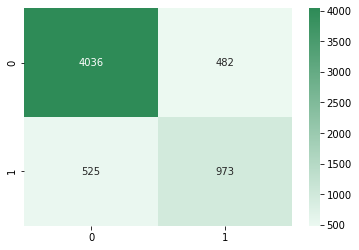

In [ ]:
sns.heatmap(ret4dp[4], cmap=cmap, annot=True, fmt='g')

In [ ]:
#For EqOdds
fairdef = 'EqOdds'
model = FairLogisticRegression(xdim, batch_size, fairdef)
train_loop(model, raw_data, train_data, epochs)
print('Validation')
Y_hat, A_hat = validation(model, valid_data)
ret4eqodds = compute_metrics(y_valid, Y_hat, a_valid, A_hat)

> Epoch | Class Loss | Adv Loss | Class Acc | Adv Acc
> 1 | 0.8880362510681152 | 0.7379366159439087 | 0.7536057692307692 | 0.3326840185676393
> 2 | 0.40266987681388855 | 0.6454000473022461 | 0.8213279177718833 | 0.4713196286472149
> 3 | 0.370682954788208 | 0.5879977941513062 | 0.8328498010610079 | 0.6684350132625995
> 4 | 0.3486548066139221 | 0.5643966794013977 | 0.8355023209549072 | 0.7175480769230769
> 5 | 0.34127551317214966 | 0.5477967262268066 | 0.8379476127320955 | 0.7250497347480106
> 6 | 0.3374181389808655 | 0.5384668111801147 | 0.8398126657824934 | 0.7272463527851458
> 7 | 0.33404046297073364 | 0.5301053524017334 | 0.840683023872679 | 0.7276193633952255
> 8 | 0.331978440284729 | 0.5239646434783936 | 0.8412632625994695 | 0.7289870689655172
> 9 | 0.32928386330604553 | 0.5172989368438721 | 0.8434598806366047 | 0.7306863395225465
> 10 | 0.3278178870677948 | 0.5135984420776367 | 0.8440815649867374 | 0.7312665782493368
Validation
> Class Acc | Adv Acc
> 0.8405917553191489 | 0.730551

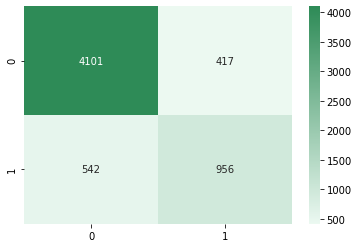

In [ ]:
sns.heatmap(ret4eqodds[4], cmap=cmap, annot=True, fmt='g')

In [ ]:
#For EqOpp
fairdef = 'EqOpp'
model = FairLogisticRegression(xdim, batch_size, fairdef)
train_loop(model, raw_data, train_data, epochs)
print('Validation')
Y_hat, A_hat = validation(model, valid_data)
ret4eqopp = compute_metrics(y_valid, Y_hat, a_valid, A_hat)

> Epoch | Class Loss | Adv Loss | Class Acc | Adv Acc
> 1 | 0.4192975163459778 | 0.2229214310646057 | 0.7571286472148542 | 0.32949270557029176
> 2 | 0.3992357850074768 | 0.18194624781608582 | 0.816768899204244 | 0.39605437665782495
> 3 | 0.37019115686416626 | 0.1443285048007965 | 0.833347148541114 | 0.47007625994694957
> 4 | 0.34329938888549805 | 0.13245418667793274 | 0.8364555702917772 | 0.5105271883289124
> 5 | 0.3364383280277252 | 0.1234147697687149 | 0.8399370026525199 | 0.5396220159151194
> 6 | 0.33281320333480835 | 0.11873026192188263 | 0.8409731432360743 | 0.5583139920424403
> 7 | 0.32927796244621277 | 0.11397261172533035 | 0.8422165119363395 | 0.5714522546419099
> 8 | 0.32662996649742126 | 0.1100284680724144 | 0.8442059018567639 | 0.5825182360742706
> 9 | 0.3240603804588318 | 0.10664424300193787 | 0.8459880636604775 | 0.5920092838196287
> 10 | 0.3228152096271515 | 0.10523121058940887 | 0.8463610742705571 | 0.5988478116710876
Validation
> Class Acc | Adv Acc
> 0.8425864361702128

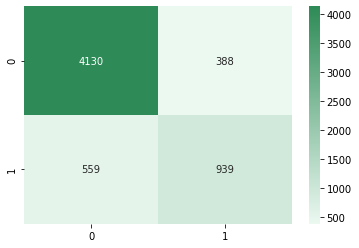

In [ ]:
sns.heatmap(ret4eqopp[4], cmap=cmap, annot=True, fmt='g')

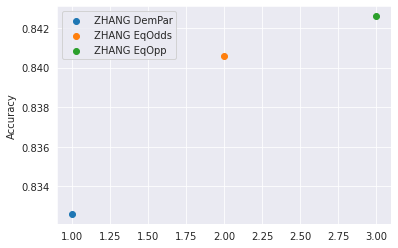

In [ ]:
#x=[1,2,3]
#y = [tf.math.reduce_mean(ret4dp[0]),tf.math.reduce_mean(ret4eqodds[0]),tf.math.reduce_mean(ret4eqodds[0])]
y=[2,4,6]
#plt.scatter()
#plt.pyplot.grid(b=True, color='darkgrey')
sns.set_style('darkgrid')
plt.ylabel('Accuracy')

'''# plotting the line 1 points 
plt.plot(fair_coeff_list, laftr_accs, label = "laftr")
# line 2 points'''

# plotting the line 2 points 
#plt.scatter(x, y)

plt.scatter(1, ret4dp[0], label = "ZHANG DemPar")

plt.scatter(2, ret4eqodds[0], label = "ZHANG EqOdds")

plt.scatter(3, ret4eqopp[0], label = "ZHANG EqOpp")

#plt.xlabel('Fair coefficient')
plt.legend()

plt.show()

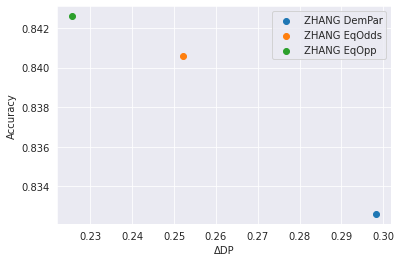

In [ ]:
plt.plot()
plt.ylabel('Accuracy')

'''# plotting the line 1 points 
plt.plot(fair_coeff_list, laftr_dps, label = "laftr")
# line 2 points'''
#axes = plt.gca()
#axes.set_xlim([0.0643,0.0645])
plt.scatter(ret4dp[1], ret4dp[0], label = "ZHANG DemPar")

plt.scatter(ret4eqodds[1], ret4eqodds[0], label = "ZHANG EqOdds")

plt.scatter(ret4eqopp[1], ret4eqopp[0], label = "ZHANG EqOpp")

plt.xlabel('\u0394DP')
plt.legend()
plt.show()

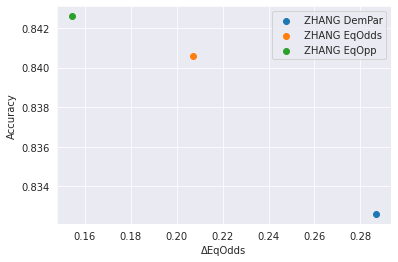

In [ ]:
plt.plot()
plt.ylabel('Accuracy')

'''# plotting the line 1 points 
plt.plot(fair_coeff_list, laftr_dps, label = "laftr")
# line 2 points'''

plt.scatter(ret4dp[2], ret4dp[0], label = "ZHANG DemPar")

plt.scatter(ret4eqodds[2], ret4eqodds[0], label = "ZHANG EqOdds")

plt.scatter(ret4eqopp[2], ret4eqopp[0], label = "ZHANG EqOpp")

plt.xlabel('\u0394EqOdds')
plt.legend()
plt.show()

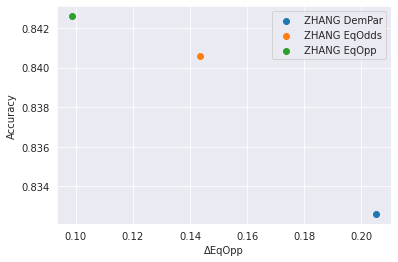

In [ ]:
plt.plot()
plt.ylabel('Accuracy')

'''# plotting the line 1 points 
plt.plot(fair_coeff_list, laftr_dps, label = "laftr")
# line 2 points'''

plt.scatter(ret4dp[3], ret4dp[0], label = "ZHANG DemPar")

plt.scatter(ret4eqodds[3], ret4eqodds[0], label = "ZHANG EqOdds")

plt.scatter(ret4eqopp[3], ret4eqopp[0], label = "ZHANG EqOpp")

plt.xlabel('\u0394EqOpp')
plt.legend()
plt.show()